# Metadata overview

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

# magics and warnings
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import os, random, codecs, json
import pandas as pd
import numpy as np

seed = 99
random.seed(seed)
np.random.seed(seed)

import nltk, sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# load metadata

df_meta = pd.read_csv("datasets_output/df_pub.csv",compression="gzip")
df_meta.drop(columns="Unnamed: 0",inplace=True)

In [24]:
df_meta.head()

,pub_id,title,abstract,publication_year,publication_month,journal,volume,issue,pages,doi,pmid,pmcid,timestamp
0,0,The Possible Immunological Pathways for the Va...,NaN,2020.0,3.0,Electronic Journal of General Medicine,17,4,NaN,10.29333/ejgm/7850,NaN,NaN,2020-03-28 08:46:55.291546
1,1,A Method of Estimating Time-to-Recovery for a ...,NaN,2020.0,3.0,Research Square,NaN,NaN,NaN,10.21203/rs.3.rs-18190/v1,NaN,NaN,2020-03-28 08:46:55.291546
2,2,Preparation for the quarantine of the cruise s...,NaN,2020.0,3.0,JMIR Preprints,NaN,NaN,NaN,10.2196/preprints.18821,NaN,NaN,2020-03-28 08:46:55.291546
3,3,Differences and similarities between Severe Ac...,NaN,2020.0,3.0,European review for medical and pharmacologica...,24,5,2781-2783,10.26355/eurrev_202003_20551,32196628.0,NaN,2020-03-28 08:46:55.291546
4,4,From SARS-CoV to SARS-CoV-2: The response and ...,Abstract:,2020.0,2.0,Fa yi xue za zhi,36,1,1-3,10.12116/j.issn.1004-5619.2020.01.001,32198983.0,NaN,2020-03-28 08:46:55.291546


In [25]:
df_meta.columns

Index(['pub_id', 'title', 'abstract', 'publication_year', 'publication_month',
       'journal', 'volume', 'issue', 'pages', 'doi', 'pmid', 'pmcid',
       'timestamp'],
      dtype='object')

#### Publication years

In [6]:
import re

def clean_year(s):
    if pd.isna(s):
        return np.nan
    if not (s>1900):
        return np.nan
    elif s>2020:
        return 2020
    return s

df_meta["publication_year"] = df_meta["publication_year"].apply(clean_year)

In [7]:
df_meta.publication_year.describe()

count    48348.000000
mean      2011.023331
std          8.935132
min       1951.000000
25%       2007.000000
50%       2013.000000
75%       2018.000000
max       2020.000000
Name: publication_year, dtype: float64

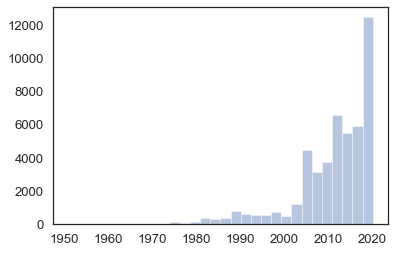

In [8]:
sns.distplot(df_meta.publication_year.tolist(), bins=30, kde=False)

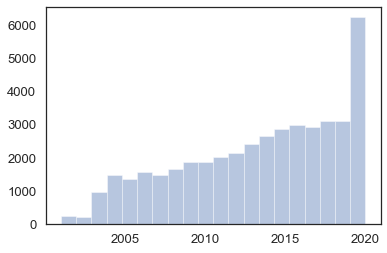

In [9]:
sns.distplot(df_meta[(pd.notnull(df_meta.publication_year)) & (df_meta.publication_year > 2000)].publication_year.tolist(), bins=20, hist=True, kde=False)

In [14]:
df_meta["abstract_length"] = df_meta.abstract.str.len()

In [18]:
df_meta[df_meta.abstract_length>0].shape

(39154, 14)

#### Null values

In [104]:
df_meta.shape

(48428, 13)

In [105]:
sum(pd.notnull(df_meta.abstract))

39154

In [106]:
sum(pd.notnull(df_meta.doi))

45393

In [107]:
sum(pd.notnull(df_meta.pmcid))

26228

In [108]:
sum(pd.notnull(df_meta.pmid))

36010

In [109]:
sum(pd.notnull(df_meta.journal))

44793

#### Journals

In [31]:
df_meta.journal.value_counts()[:30]

Journal of Virology                                    1747
PLoS One                                               1557
Virology                                                865
Emerg Infect Dis                                        741
The Lancet                                              682
Viruses                                                 570
medRxiv                                                 510
Arch Virol                                              500
Virus Research                                          500
Vaccine                                                 486
Sci Rep                                                 480
Veterinary Microbiology                                 445
Journal of Virological Methods                          395
The Lancet Infectious Diseases                          388
Journal of Clinical Virology                            379
PLoS Pathog                                             357
Virol J                                 

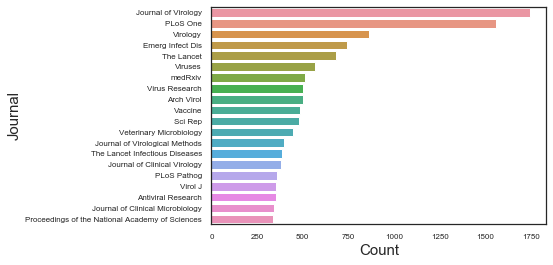

In [33]:
df_sub = df_meta[df_meta.journal.isin(df_meta.journal.value_counts()[:20].index.tolist())]
b = sns.countplot(y="journal", data=df_sub, order=df_sub['journal'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Journal",fontsize=15)
b.tick_params(labelsize=8)

#### Sources and licenses

For CORD19

In [41]:
df_cord.head()

,cord19_metadata_id,source,license,full_text_file,ms_academic_id,who_covidence,sha,full_text,pub_id
0,0,biorxiv,biorxiv,biorxiv_medrxiv,NaN,NaN,f056da9c64fbf00a4645ae326e8a4339d015d155,There are many different methods that characte...,5814
1,1,biorxiv,biorxiv,biorxiv_medrxiv,NaN,NaN,daf32e013d325a6feb80e83d15aabc64a48fae33,The term metapopulation was coined by Levins [...,5815
2,2,biorxiv,biorxiv,biorxiv_medrxiv,NaN,NaN,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,Antibodies are essential components of the imm...,5816
3,3,biorxiv,biorxiv,biorxiv_medrxiv,NaN,NaN,4da8a87e614373d56070ed272487451266dce919,Metagenomics can be defined as the analysis of...,5817
4,4,biorxiv,biorxiv,biorxiv_medrxiv,NaN,NaN,eccef80cfbe078235df22398f195d5db462d8000,: Schematic of transmission links overlaid on ...,5818


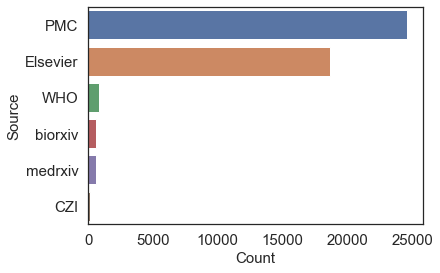

In [42]:
# source
df_sub = df_cord[df_cord.source.isin(df_cord.source.value_counts()[:30].index.tolist())]
b = sns.countplot(y="source", data=df_sub, order=df_sub['source'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Source",fontsize=15)
b.tick_params(labelsize=15)

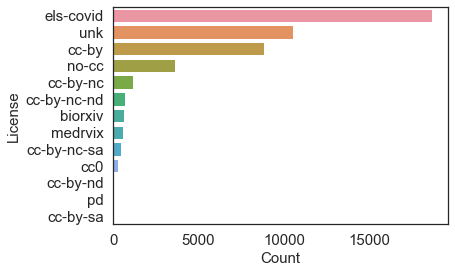

In [43]:
# license
df_sub = df_cord[df_cord.license.isin(df_cord.license.value_counts()[:30].index.tolist())]
b = sns.countplot(y="license", data=df_sub, order=df_sub['license'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("License",fontsize=15)
b.tick_params(labelsize=15)

#### Full text availability

In [54]:
df_cord["has_full_text"] = pd.notnull(df_cord.full_text)
df_cord = df_cord.merge(df_meta, how="left", left_on="pub_id", right_on="pub_id")

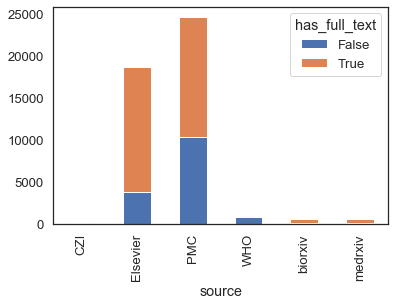

In [55]:
# full text x source
df_plot = df_cord.groupby(['has_full_text', 'source']).size().reset_index().pivot(columns='has_full_text', index='source', values=0)
df_plot.plot(kind='bar', stacked=True)

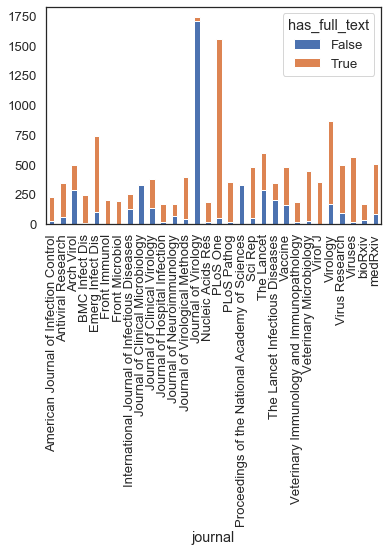

In [56]:
# full text x journal
df_sub = df_cord[df_cord.journal.isin(df_cord.journal.value_counts()[:30].index.tolist())]
df_plot = df_sub.groupby(['has_full_text', 'journal']).size().reset_index().pivot(columns='has_full_text', index='journal', values=0)
df_plot.plot(kind='bar', stacked=True)

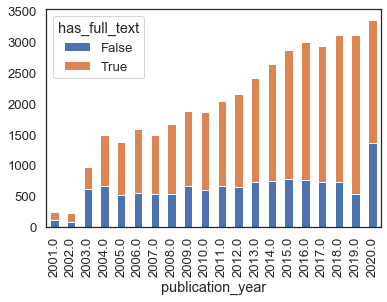

In [58]:
# full text x year
df_sub = df_cord[(pd.notnull(df_cord.publication_year)) & (df_cord.publication_year > 2000)]
df_plot = df_sub.groupby(['has_full_text', 'publication_year']).size().reset_index().pivot(columns='has_full_text', index='publication_year', values=0)
df_plot.plot(kind='bar', stacked=True)

### Overlap of CORD19 with Dimensions and WHO

This is still problematically low..

In [59]:
# datasets

who_latest = "datasets_input/WHO_28_03_2020.csv"
dimensions_latest = "datasets_input/Dimensions_28_03_2020.csv"

df_who = pd.read_csv(who_latest)
df_dimensions = pd.read_csv(dimensions_latest)

In [60]:
who_dois = df_who[pd.notnull(df_who["DOI"])]["DOI"].tolist()
dimensions_dois = df_dimensions[pd.notnull(df_dimensions["DOI"])]["DOI"].tolist()

In [61]:
cord_dois = df_cord[pd.notnull(df_cord["doi"])]["doi"].tolist()

In [62]:
len(cord_dois)

42441

In [63]:
len(set(cord_dois).intersection(set(who_dois)))/len(set(who_dois))

0.4323866044934294

In [64]:
len(set(cord_dois).intersection(set(dimensions_dois)))/len(set(dimensions_dois))

0.592679794520548

In [65]:
len(set(who_dois).intersection(set(dimensions_dois)))/len(set(dimensions_dois))

0.2604880136986301

## Abstracts

In [77]:
abstracts = df_meta[pd.notnull(df_meta["abstract"])].abstract.tolist()
abstracts[1]

'In December 2019, a new type of coronavirus pneumonia (COVID-19) emerged in Wuhan, Hubei, and spread rapidly to China and over 100 countries around the world. The lung injury and repair caused by COVID-19 has many similarities with the onset and progression of interstitial lung disease (ILD) . Therefore, it is difficult to distinguish between COVID-19 and some types of new-onset ILD or other causes leading to acute exacerbation of ILD. Clinicians need to comprehensively analyze the epidemic history, disease onset characteristics, clinical manifestations, image characteristics, serological andpathogenic microorganism test results to confirm diagnosis. Because of this, the article will discuss the issues related to the differential diagnosis and management of COVID-19 and ILD, and try to provide reasonable suggestions.'

#### Topic modelling

In [78]:
from tqdm import tqdm
import gensim, sklearn, spacy
import pyLDAvis.gensim

In [31]:
!python -m spacy download en


    Linking successful
    /anaconda3/envs/covid/lib/python3.7/site-packages/en_core_web_sm -->
    /anaconda3/envs/covid/lib/python3.7/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [79]:
nlp = spacy.load('en')
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

In [80]:
%%time

processed_docs = list()
for doc in nlp.pipe(abstracts, n_threads=5, batch_size=10):

    # Process document using Spacy NLP pipeline.
    #ents = doc.ents  # Named entities

    # Keep only words (no numbers, no punctuation).
    # Lemmatize tokens, remove punctuation and remove stopwords.
    doc = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

    # Remove common words from a stopword list and keep only words of length 3 or more.
    doc = [token for token in doc if token not in STOPWORDS and len(token) > 2]

    # Add named entities, but only if they are a compound of more than one word.
    #doc.extend([str(entity) for entity in ents if len(entity) > 1])
                        
    processed_docs.append(doc)

CPU times: user 1h 34min 13s, sys: 8min 20s, total: 1h 42min 34s
Wall time: 28min 18s


In [81]:
import pickle

pickle.dump(processed_docs, open("datasets_output/processed_docs.pk", "wb"))

In [50]:
import pickle

processed_docs = pickle.load(open("datasets_output/processed_docs.pk", "rb"))

In [82]:
docs = processed_docs
del processed_docs

# Add bigrams
from gensim.models.phrases import Phrases
# Add bigrams to docs (only ones that appear several times or more). A better approach would be to use a chi_sq test.
bigram = Phrases(docs, min_count=50)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [83]:
# Remove rare and common tokens.
# Filter out words that occur too frequently or too rarely.
max_freq = 0.5
min_wordcount = 10

In [84]:
# Create a dictionary representation of the documents, and filter out frequent and rare words.
from gensim.corpora import Dictionary
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=min_wordcount, no_above=max_freq)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
#MmCorpus.serialize("models/corpus.mm", corpus)

print('Number of unique tokens: %d' % len(dictionary))
print('Number of docs: %d (%d)' % (len(corpus),len(abstracts)))

Number of unique tokens: 14389
Number of docs: 39154 (39154)


In [85]:
%%time

from gensim.models import LdaMulticore, LdaModel
params = {'num_topics': 15,'passes': 3, 'random_state': seed}
model = LdaModel(corpus=corpus, num_topics=params['num_topics'], id2word=dictionary, #workers=6,
                passes=params['passes'], random_state=params['random_state'])

CPU times: user 1min 24s, sys: 796 ms, total: 1min 24s
Wall time: 1min 23s


In [86]:
model.show_topics(num_words=5, num_topics=params['num_topics'])

[(0,
  '0.049*"respiratory" + 0.047*"virus" + 0.041*"infection" + 0.023*"viral" + 0.023*"child"'),
 (1,
  '0.048*"rna" + 0.028*"sequence" + 0.024*"virus" + 0.024*"gene" + 0.015*"genome"'),
 (2,
  '0.079*"influenza" + 0.023*"influenza_virus" + 0.022*"case" + 0.018*"pandemic" + 0.012*"virus"'),
 (3,
  '0.025*"group" + 0.023*"diarrhea" + 0.022*"pig" + 0.021*"day" + 0.019*"strain"'),
 (4,
  '0.016*"rat" + 0.013*"increase" + 0.012*"group" + 0.011*"study" + 0.011*"effect"'),
 (5,
  '0.038*"protein" + 0.024*"virus" + 0.021*"cell" + 0.015*"activity" + 0.014*"viral"'),
 (6,
  '0.056*"cell" + 0.025*"infection" + 0.022*"mouse" + 0.019*"virus" + 0.018*"response"'),
 (7,
  '0.026*"calf" + 0.025*"assay" + 0.024*"sample" + 0.021*"test" + 0.021*"pcr"'),
 (8,
  '0.030*"sars" + 0.030*"cov" + 0.029*"antibody" + 0.027*"coronavirus" + 0.024*"protein"'),
 (9,
  '0.034*"virus" + 0.022*"disease" + 0.022*"human" + 0.017*"animal" + 0.013*"specie"'),
 (10,
  '0.020*"disease" + 0.015*"review" + 0.014*"vaccine" + 

In [87]:
# plot topics (NOTE: the IDs here do not match those from the model)
data =  pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.display(data)

In [110]:
# topics over time
# the topics of ALL the documents of our corpus

df_local = df_meta[pd.notnull(df_meta["abstract"])]
publication_years = df_local.publication_year.tolist()
dois = df_local.doi.tolist()
topics = np.zeros((len(docs),params['num_topics']))

for n,doc_topics in enumerate(model.get_document_topics(corpus)):
    for t in doc_topics:
        topics[n][t[0]] = t[1]

In [111]:
topics[0,:]

array([0.03333401, 0.03333402, 0.03333398, 0.03333421, 0.03333408,
       0.03333404, 0.03333399, 0.03333408, 0.03333404, 0.03333401,
       0.53332347, 0.03333399, 0.03333404, 0.03333413, 0.03333398])

In [112]:
model.get_document_topics(corpus[0])

[(0, 0.033333972),
 (1, 0.033333976),
 (2, 0.033333942),
 (3, 0.033334054),
 (4, 0.03333404),
 (5, 0.033333994),
 (6, 0.03333395),
 (7, 0.033334035),
 (8, 0.033333994),
 (9, 0.033333965),
 (10, 0.033334073),
 (11, 0.033333957),
 (12, 0.033334),
 (13, 0.53332406),
 (14, 0.03333394)]

In [113]:
df_topics = pd.DataFrame(topics)

In [114]:
df_topics["year"] = publication_years
df_topics["doi"] = dois

In [115]:
from_which_year = 2000

grouped = df_topics.groupby('year')
df_grouped = grouped.aggregate(np.mean)
df_grouped = df_grouped[df_grouped.index >= from_which_year]
#df_grouped

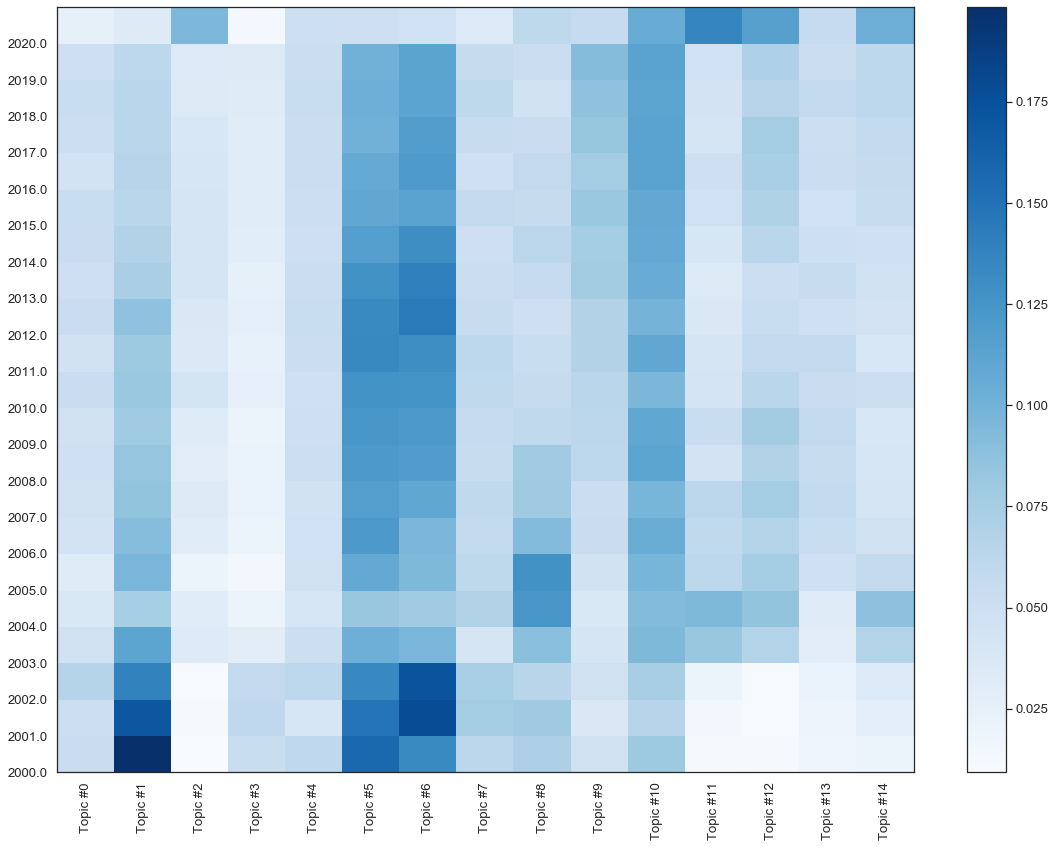

In [116]:
fig = plt.figure(figsize=(16, 12))
plt.pcolor(df_grouped.to_numpy(), norm=None, cmap='Blues')
plt.yticks(np.arange(df_grouped.to_numpy().shape[0]), df_grouped.index.values)
plt.xticks(np.arange(df_grouped.to_numpy().shape[1])+0.5, ["Topic #"+str(n) for n in range(model.num_topics)], rotation = 90)
plt.colorbar(cmap='Blues')  # plot colorbar
plt.tight_layout()  # fixes margins
plt.show()

#### Language modelling

In [118]:
from gensim.models import Word2Vec
import pickle

processed_docs = pickle.load(open("datasets_output/processed_docs.pk", "rb"))

model = Word2Vec(processed_docs, size=256, window=10, min_count=2, workers=6)

In [119]:
model.wv.most_similar("coronavirus")

[('covs', 0.6251739263534546),
 ('cov', 0.5501048564910889),
 ('betacoronavirus', 0.5166511535644531),
 ('hcov', 0.48612651228904724),
 ('hcovs', 0.4802132546901703),
 ('coronaviruses', 0.48010629415512085),
 ('astrovirus', 0.4582931399345398),
 ('virus', 0.4369690418243408),
 ('scovs', 0.4323999881744385),
 ('alphacoronavirus', 0.4261910915374756)]

#### Keyword extraction

Using [RAKE](https://csurfer.github.io/rake-nltk/_build/html/index.html)

In [126]:
from rake_nltk import Rake

# Uses stopwords for English from NLTK, and all puntuation characters by default
r = Rake(min_length=2)

# Extraction given the text
r.extract_keywords_from_text(abstracts[1])

In [127]:
# To get keyword phrases ranked highest to lowest.
r.get_ranked_phrases()[:10]

['serological andpathogenic microorganism test results',
 'provide reasonable suggestions',
 '100 countries around',
 'interstitial lung disease',
 'disease onset characteristics',
 'onset ild',
 'lung injury',
 'image characteristics',
 'spread rapidly',
 'repair caused']

In [128]:
# To get keyword phrases ranked highest to lowest with scores.
r.get_ranked_phrases_with_scores()[:10]

[(25.0, 'serological andpathogenic microorganism test results'),
 (9.0, 'provide reasonable suggestions'),
 (9.0, '100 countries around'),
 (8.5, 'interstitial lung disease'),
 (8.0, 'disease onset characteristics'),
 (4.5, 'onset ild'),
 (4.5, 'lung injury'),
 (4.5, 'image characteristics'),
 (4.0, 'spread rapidly'),
 (4.0, 'repair caused')]

In [123]:
len(processed_docs)

39154

In [124]:
r = Rake(min_length=2, max_length=3)
# Extraction given the list of strings where each string is a sentence.
r.extract_keywords_from_sentences([" ".join(d) for d in processed_docs])

In [125]:
# To get keyword phrases ranked highest to lowest with scores.
r.get_ranked_phrases_with_scores()[:50]

[(9.0, 'welcome adam vaughan'),
 (9.0, 'wash hand thoroughly'),
 (9.0, 'understand pandemic datum'),
 (9.0, 'trypsin cod trypsin'),
 (9.0, 'trichothecene mycotoxin deoxynivalenol'),
 (9.0, 'tolerance self rna'),
 (9.0, 'summarize presentation discussion'),
 (9.0, 'suffer cold addition'),
 (9.0, 'substitute mask alternative'),
 (9.0, 'strategy widely applicable'),
 (9.0, 'start codon suggest'),
 (9.0, 'speak italy day'),
 (9.0, 'set richard smyth'),
 (9.0, 'sensible way plan'),
 (9.0, 'scary hard stand'),
 (9.0, 'remain committed neurorehabilitation'),
 (9.0, 'rely quarantine isolation'),
 (9.0, 'pneumonia problem worldwide'),
 (9.0, 'new york dutton'),
 (9.0, 'need think containment'),
 (9.0, 'method general interest'),
 (9.0, 'measure cleavage angiotensin'),
 (9.0, 'knowledge sars high'),
 (9.0, 'join faculty worker'),
 (9.0, 'influence hbv transcription'),
 (9.0, 'individual different value'),
 (9.0, 'illustrate application pandemic'),
 (9.0, 'haq posthoc conclusion'),
 (9.0, 'febril